In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import utils
import preprocessing
importlib.reload(utils)
importlib.reload(preprocessing)
import gower
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator

In [15]:
# Load data
df = preprocessing.load_dataset()

<Axes: >

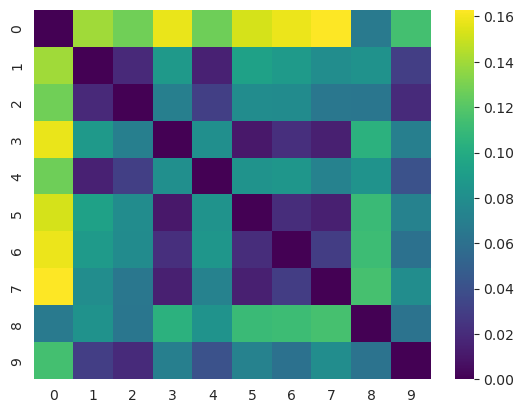

In [18]:
distance_matrix = gower.gower_matrix(df)
sns.heatmap(distance_matrix[:10,:10], cmap='viridis')

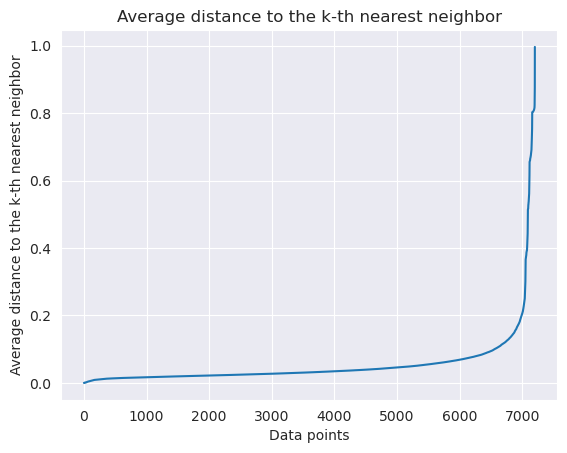

coordinates are: 7166.000000,0.803368


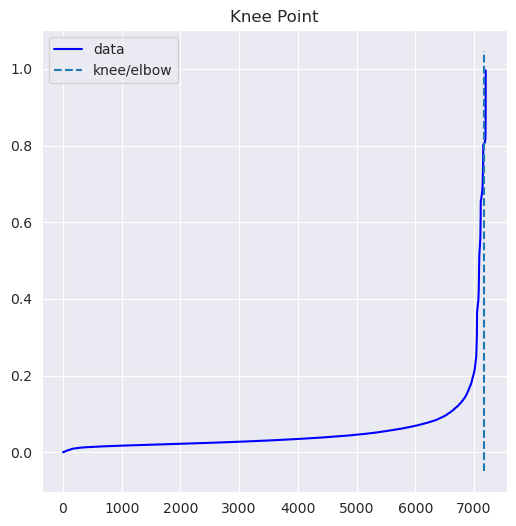

In [21]:
# set the number of neighbors
k = 5
# initialize the model
neigh = NearestNeighbors(n_neighbors=k)
# fit the model
neigh.fit(df)
# compute the distances and the indices of the k-th nearest neighbors
distances, indices = neigh.kneighbors(df)
# sort the distances
distances_sorted = np.sort(distances, axis=0)
# compute the average distance
avg_distances = np.mean(distances_sorted, axis=1)
# sort the average distances
avg_distances_sorted = np.sort(avg_distances)
# plot the average distances
plt.plot(avg_distances_sorted)
plt.xlabel('Data points')
plt.ylabel('Average distance to the k-th nearest neighbor')
plt.title('Average distance to the k-th nearest neighbor')
plt.show()

# find the knee point
kl = KneeLocator(range(len(avg_distances_sorted)), avg_distances_sorted, curve='convex', direction='increasing')

print(f"coordinates are: {kl.knee:2f},{kl.knee_y:2f}")
kl.plot_knee()

In [25]:
labels = (distances[:,4] > kl.knee_y)*-1

In [26]:
pd.DataFrame(labels).value_counts()

 0    7049
-1     151
Name: count, dtype: int64

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7200 samples in 0.026s...
[t-SNE] Computed neighbors for 7200 samples in 0.498s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7200
[t-SNE] Computed conditional probabilities for sample 2000 / 7200
[t-SNE] Computed conditional probabilities for sample 3000 / 7200
[t-SNE] Computed conditional probabilities for sample 4000 / 7200
[t-SNE] Computed conditional probabilities for sample 5000 / 7200
[t-SNE] Computed conditional probabilities for sample 6000 / 7200
[t-SNE] Computed conditional probabilities for sample 7000 / 7200
[t-SNE] Computed conditional probabilities for sample 7200 / 7200
[t-SNE] Mean sigma: 0.003135
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.378937
[t-SNE] KL divergence after 1000 iterations: 0.974475


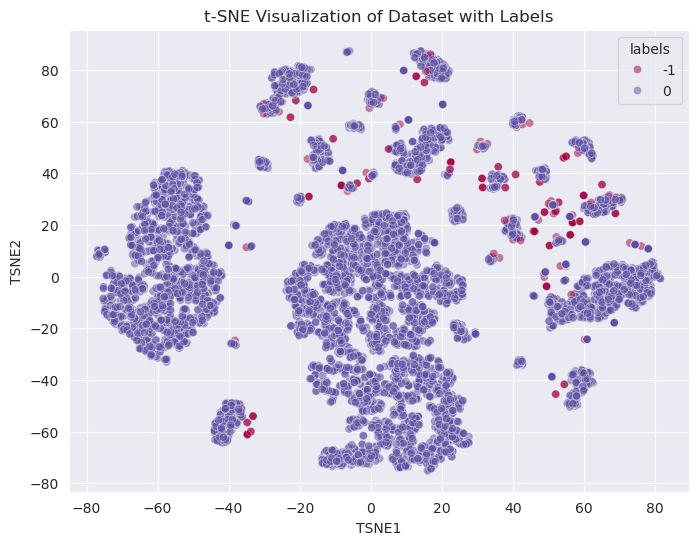

In [27]:
utils.plot_TSNE(df, labels, dist_matrix=distance_matrix)